In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import get_file

In [20]:
dataset_path = get_file("auto-mpg.data",
                        "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

columns = ['MPG','Cylinders','Displacement','Horsepower','Weight', 'Acceleration', 'Model Year']
dataset = pd.read_csv(dataset_path, names=columns,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = dataset.dropna()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year
27.0,4,140.0,86.0,2790.0,15.6,82,1
44.0,4,97.0,52.0,2130.0,24.6,82,2
32.0,4,135.0,84.0,2295.0,11.6,82,1
28.0,4,120.0,79.0,2625.0,18.6,82,1
31.0,4,119.0,82.0,2720.0,19.4,82,1


In [40]:
train_dataset = dataset.sample(frac=0.8, random_state=1)
test_dataset = dataset.drop(train_dataset.index)

train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

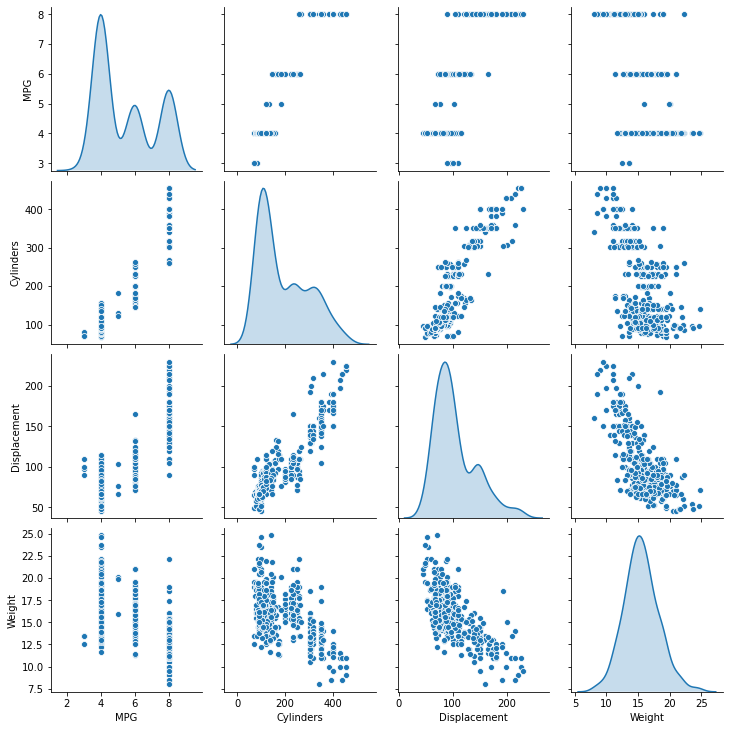

In [54]:
sns.pairplot(dataset[["MPG", "Cylinders", "Displacement", "Weight"]], diag_kind="kde")

In [41]:
data_stats = train_dataset.describe().transpose()
label_stats = train_labels.describe().transpose()

In [73]:
def normalize(x, stats):
    return (x - stats['mean']) / stats['std']

def denormalize(x, stats):
    return x * stats['std'] + stats['mean']

norm_train_data = normalize(train_dataset, data_stats)
norm_train_labels = normalize(train_labels, label_stats)

In [111]:
from tensorflow.keras.experimental import LinearModel

model = LinearModel(len(train_dataset.keys()), activation='linear', dtype='float32')
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae', 'mse'])
history = model.fit(norm_train_data, norm_train_labels, epochs=200, verbose=0)

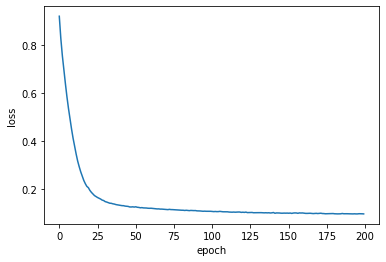

In [112]:
epochs = history.epoch
loss = history.history['loss']

fig = plt.figure()
plot = fig.add_subplot()
plot.set_xlabel('epoch')
plot.set_ylabel('loss')
plot.plot(epochs, loss)

In [106]:
norm_test_data = normalize(test_dataset, data_stats)
norm_test_labels = normalize(test_labels, label_stats)
model.evaluate(norm_test_data, norm_test_labels)

1/1 [==============================] - 0s 1ms/step - loss: 0.1303 - mae: 0.2996 - mse: 0.1303


[0.13030651211738586, 0.29958435893058777, 0.13030651211738586]

In [113]:
sampled_data = norm_test_data.iloc[:10]
sampled_labels = denormalize(norm_test_labels.iloc[:10], label_stats)
predictions = [p[0] for p in denormalize(model.predict(sampled_data), label_stats)]

for i in range(10):
    print(f'predicted: {predictions[i]} actual: {sampled_labels.iloc[i]}')
    

predicted: 8.033313751220703 actual: 8.0
predicted: 7.264460563659668 actual: 8.0
predicted: 4.622306823730469 actual: 4.0
predicted: 5.549656391143799 actual: 6.0
predicted: 4.733019828796387 actual: 4.0
predicted: 3.826479434967041 actual: 4.0
predicted: 4.884463310241699 actual: 4.0
predicted: 4.433934688568115 actual: 4.0
predicted: 4.203751087188721 actual: 4.0
predicted: 3.9942846298217773 actual: 4.0


array([0, 2])